In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn import preprocessing
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder 

In [2]:
data=pd.read_csv("groceries.csv",header=None)

In [3]:
data

,0,1,2,3,4,5,6,7,8,9,...,36,37,38,39,40,41,42,43,44,45
0,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,sausage,chicken,beef,hamburger meat,citrus fruit,grapes,root vegetables,whole milk,butter,whipped/sour cream,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9831,cooking chocolate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9832,chicken,citrus fruit,other vegetables,butter,yogurt,frozen dessert,domestic eggs,rolls/buns,rum,cling film/bags,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9833,semi-finished bread,bottled water,soda,bottled beer,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data.dtypes

0      object
1      object
2      object
3      object
4      object
5      object
6      object
7      object
8      object
9      object
10     object
11     object
12     object
13     object
14     object
15     object
16     object
17     object
18     object
19     object
20     object
21     object
22     object
23     object
24     object
25     object
26     object
27     object
28     object
29     object
30     object
31     object
32    float64
33    float64
34    float64
35    float64
36    float64
37    float64
38    float64
39    float64
40    float64
41    float64
42    float64
43    float64
44    float64
45    float64
dtype: object

In [5]:
data.fillna(0,inplace=True)

In [6]:
def createlist(A_list,value):
    return list(filter(lambda x:x!=value,A_list))

In [7]:
list_all_transaction=[]

for index,row in data.iterrows():
    transaction=row.values.tolist()
    transaction=createlist(transaction,0)
    list_all_transaction.append(transaction)
    
list_all_transaction

[['citrus fruit', 'semi-finished bread', 'margarine', 'ready soups'],
 ['tropical fruit', 'yogurt', 'coffee'],
 ['whole milk'],
 ['pip fruit', 'yogurt', 'cream cheese ', 'meat spreads'],
 ['other vegetables',
  'whole milk',
  'condensed milk',
  'long life bakery product'],
 ['whole milk', 'butter', 'yogurt', 'rice', 'abrasive cleaner'],
 ['rolls/buns'],
 ['other vegetables',
  'UHT-milk',
  'rolls/buns',
  'bottled beer',
  'liquor (appetizer)'],
 ['pot plants'],
 ['whole milk', 'cereals'],
 ['tropical fruit',
  'other vegetables',
  'white bread',
  'bottled water',
  'chocolate'],
 ['citrus fruit',
  'tropical fruit',
  'whole milk',
  'butter',
  'curd',
  'yogurt',
  'flour',
  'bottled water',
  'dishes'],
 ['beef'],
 ['frankfurter', 'rolls/buns', 'soda'],
 ['chicken', 'tropical fruit'],
 ['butter', 'sugar', 'fruit/vegetable juice', 'newspapers'],
 ['fruit/vegetable juice'],
 ['packaged fruit/vegetables'],
 ['chocolate'],
 ['specialty bar'],
 ['other vegetables'],
 ['butter milk

In [8]:
da=TransactionEncoder()
da_bool=da.fit(list_all_transaction).transform(list_all_transaction)
data=pd.DataFrame(da_bool,columns=da.columns_)

In [9]:
data

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,False,False,False,False,False,False,False,False,False,True,...,False,False,False,True,False,False,False,True,False,False
9831,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9832,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
9833,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [10]:
frequent_itemsets=apriori(data,min_support=0.03,use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.033452,(UHT-milk)
1,0.052466,(beef)
2,0.033249,(berries)
3,0.080529,(bottled beer)
4,0.110524,(bottled water)
...,...,...
58,0.048907,"(root vegetables, whole milk)"
59,0.040061,"(soda, whole milk)"
60,0.042298,"(tropical fruit, whole milk)"
61,0.032232,"(whipped/sour cream, whole milk)"


In [11]:
rules=association_rules(frequent_itemsets, metric="lift",min_threshold=1.5)
rules=rules.reset_index()

In [12]:
rules.sort_values('lift',ascending = False)

,index,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,0,(other vegetables),(root vegetables),0.193493,0.108998,0.047382,0.244877,2.246605,0.026291,1.179941
1,1,(root vegetables),(other vegetables),0.108998,0.193493,0.047382,0.434701,2.246605,0.026291,1.426693
11,11,(sausage),(rolls/buns),0.093950,0.183935,0.030605,0.325758,1.771048,0.013324,1.210344
10,10,(rolls/buns),(sausage),0.183935,0.093950,0.030605,0.166390,1.771048,0.013324,1.086899
3,3,(tropical fruit),(other vegetables),0.104931,0.193493,0.035892,0.342054,1.767790,0.015589,1.225796
2,2,(other vegetables),(tropical fruit),0.193493,0.104931,0.035892,0.185497,1.767790,0.015589,1.098913
16,16,(whipped/sour cream),(whole milk),0.071683,0.255516,0.032232,0.449645,1.759754,0.013916,1.352735
17,17,(whole milk),(whipped/sour cream),0.255516,0.071683,0.032232,0.126144,1.759754,0.013916,1.062323
13,13,(whole milk),(root vegetables),0.255516,0.108998,0.048907,0.191405,1.756031,0.021056,1.101913
12,12,(root vegetables),(whole milk),0.108998,0.255516,0.048907,0.448694,1.756031,0.021056,1.350401


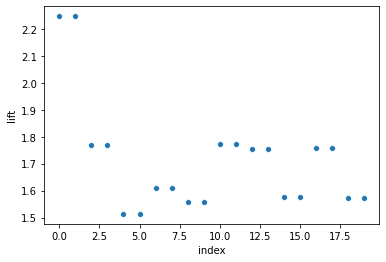

In [13]:
sns.scatterplot(data=rules,x='index',y='lift')

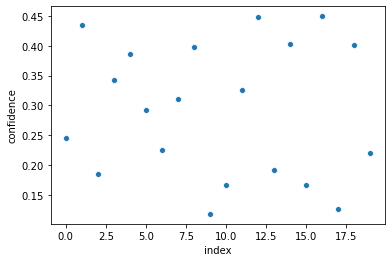

In [14]:
sns.scatterplot(data=rules,x='index',y='confidence')